In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

## Load dataset

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [3]:
partial_steps = 50

In [4]:
X_partial = X[::partial_steps]
X_partial.shape

(1400, 784)

In [5]:
y_partial = np.array([int(y) for y in y[::partial_steps]])
y_partial.shape

(1400,)

Chaque observation de ce jeu de données est une image de 28 pixels par 28 pixels, dont l’étiquette y[i] est le chiffre qu’elle représente, et les 784 features le niveau de gris (entre 0 et 255) du pixel correspondant (car 28 x 28 = 784)

## Display demo image

Text(0.5, 1.0, 'Value: 0')

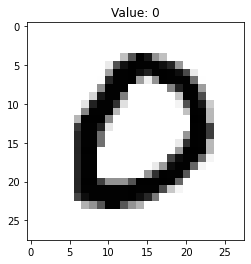

In [6]:
sample_idx = 42
sample_image = np.reshape(X_partial[sample_idx, :], (28, 28))
plt.imshow(sample_image, cmap='binary')
plt.title(f"Value: {y_partial[sample_idx]}")

In [7]:
# 1. Choisissons le clustering avec kmeans 
from sklearn import cluster
myclust = cluster.KMeans(n_clusters=10)
myclust.fit(X_partial)

KMeans(n_clusters=10)

In [8]:
# 2. Visualisation
# On commence par réduire la dimension des données avec tSNE. On scale d’abord les données :
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_partial)
X_scaled = std_scale.transform(X_partial)

In [9]:
# Puis on applique tSNE aux données scalées :
from sklearn import manifold
tsne = manifold.TSNE(n_components=2, init='pca')
X_trans = tsne.fit_transform(X_scaled)

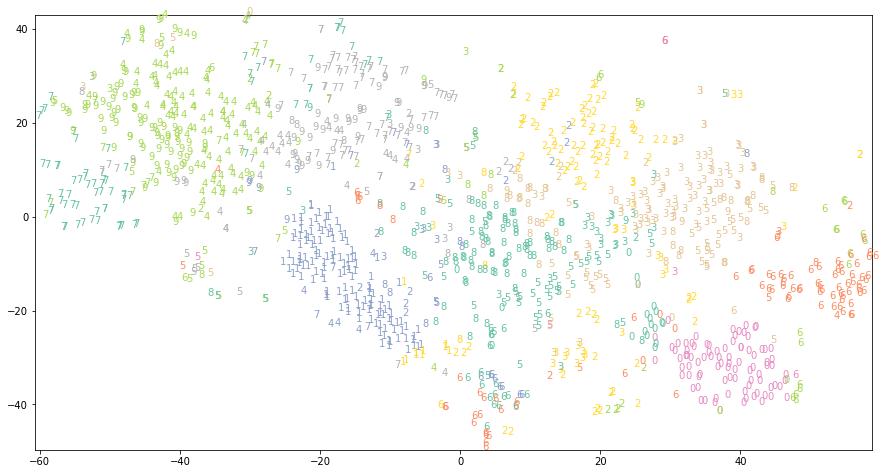

In [10]:
# Puis on visualise, selon la méthode donnée dans le coup de pouce :
from matplotlib import pyplot as plt # Dans Jupyter : % pylab inline
plt.figure(figsize=(15,8))
for i in range(X_partial.shape[0]): # pour chaque point
    plt.text(
            X_trans[i, 0],
            X_trans[i, 1],
            str('%d' % y_partial[i]),
            color=plt.cm.Set2(myclust.labels_[i]/10.))

# On redéfinit les axes pour bien voir tous les points
plt.xlim([np.min(X_trans[:, 0]), np.max(X_trans[:, 0])])
plt.ylim([np.min(X_trans[:, 1]), np.max(X_trans[:, 1])])

# On affiche l'image
plt.show()

In [11]:
from sklearn import metrics
# 3. Évaluation
# Pour l’évaluation intrinsèque, je choisis le coefficient de silhouette :
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_partial, myclust.labels_))

# Pour la comparaison aux étiquettes, je choisis l’indice de Rand ajusté :
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y_partial, myclust.labels_))


Silhouette Coefficient: 0.061
Adjusted Rand Index: 0.367


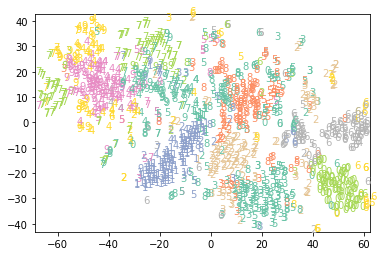

Silhouette Coefficient: 0.058
Adjusted Rand Index: 0.383


In [12]:
X = X_partial
y = y_partial

# 1. Choisissons le clustering avec kmeans 
from sklearn import cluster
myclust = cluster.KMeans(n_clusters=10)
myclust.fit(X)

# 2. Visualisation
# On commence par réduire la dimension des données avec tSNE. On scale d’abord les données :
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Puis on applique tSNE aux données scalées :
from sklearn import manifold
tsne = manifold.TSNE(n_components=2, init='pca')
X_trans = tsne.fit_transform(X_scaled)

# Puis on visualise, selon la méthode donnée dans le coup de pouce :
from matplotlib import pyplot as plt # Dans Jupyter : % pylab inline
plt.figure()
for i in range(X.shape[0]): # pour chaque point
    plt.text(X_trans[i, 0], X_trans[i, 1], str('%d' % y[i]),
            color=plt.cm.Set2(myclust.labels_[i]/10.))

# On redéfinit les axes pour bien voir tous les points
plt.xlim([np.min(X_trans[:, 0]), np.max(X_trans[:, 0])])
plt.ylim([np.min(X_trans[:, 1]), np.max(X_trans[:, 1])])

# On affiche l'image
plt.show()

# 3. Évaluation
# Pour l’évaluation intrinsèque, je choisis le coefficient de silhouette :
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, myclust.labels_))

# Pour la comparaison aux étiquettes, je choisis l’indice de Rand ajusté :
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, myclust.labels_))
